In [44]:
# all of the imports
import pandas as pd
import numpy as np
import pickle 
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import SCORERS
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV



% matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
dfs=pd.read_csv('https://www.dropbox.com/s/3pb5ewcbt8iyja2/cars3_sunday.csv?dl=1',sep='\t')

In [4]:
dfs=dfs.iloc[:,1:]

In [7]:
newd=dfs[['Price','Miles','Transmission','DriveType','FuelType','citympg','Make','Age']]

In [8]:
newd

,Price,Miles,Transmission,DriveType,FuelType,citympg,Make,Age
0,10872.0,39823.0,Automatic,FWD,Gas,29.0,Kia,1
1,14772.0,40694.0,Automatic,FWD,Gas,27.0,Chevrolet,1
2,14772.0,43010.0,Automatic,FWD,Gas,27.0,Chevrolet,1
3,14772.0,43829.0,Automatic,FWD,Gas,27.0,Chevrolet,1
4,7950.0,68359.0,Automatic,FWD,Hybrid,49.0,Honda,12
5,13995.0,64389.0,Automatic,FWD,Gas,24.0,Mitsubishi,2
6,15072.0,38238.0,Automatic,FWD,Gas,27.0,Chevrolet,1
7,14772.0,40241.0,Automatic,FWD,Gas,27.0,Chevrolet,1
8,11995.0,74138.0,Automatic,AWD,Gas,16.0,Land,10
9,13355.0,31350.0,Automatic,FWD,Gas,30.0,Chevrolet,1


In [9]:
newd['log_price']=np.log(dfs['Price'])

In [10]:
newd['cmpg']=np.log(dfs['citympg'])

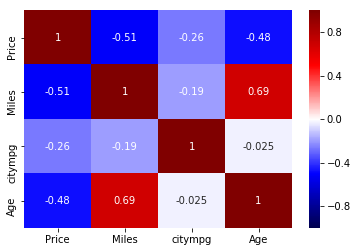

In [11]:
sns.heatmap(dfs.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);




In [13]:
#Linear Modelling on Continous Variable
lsm = smf.ols('Price ~ Miles + Age + citympg', data = dfs)
fit1 = lsm.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     553.6
Date:                Tue, 16 Oct 2018   Prob (F-statistic):          1.11e-272
Time:                        06:31:54   Log-Likelihood:                -22402.
No. Observations:                2376   AIC:                         4.481e+04
Df Residuals:                    2372   BIC:                         4.483e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.03e+04    164.400    123.468      0.000       2e+04    2.06e+04
Miles         -0.0750      0.004    -21.185      0.000      -0.082      -0.068
Age         -259.1290     35.547     -7.290      0.000    -328.836    -189.422
citympg      -70.6385      3.228    -21.882      0.000     -76.969     -64.308
==============================================================================
Omnibus:                      439.432   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              884.900
Skew:                           1.094   Prob(JB):                    7.02e-193
Kurtosis:                       5.037   Cond. No.                     1.24e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#Adding logprice & log citympg to model
lsm = smf.ols('log_price ~ Miles + Age + cmpg', data = newd)
fit2 = lsm.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     970.1
Date:                Tue, 16 Oct 2018   Prob (F-statistic):               0.00
Time:                        06:33:33   Log-Likelihood:                 504.69
No. Observations:                2376   AIC:                            -1001.
Df Residuals:                    2372   BIC:                            -978.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.9469      0.042    263.503      0.000      10.865      11.028
Miles       -5.87e-06    2.3e-07    -25.495      0.000   -6.32e-06   -5.42e-06
Age           -0.0346      0.002    -15.113      0.000      -0.039      -0.030
cmpg          -0.3259      0.012    -27.590      0.000      -0.349      -0.303
==============================================================================
Omnibus:                       69.230   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.126
Skew:                           0.314   Prob(JB):                     2.21e-21
Kurtosis:                       3.752   Cond. No.                     4.98e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
#Making a DataFrame with Categorical Variables
wmake=pd.get_dummies(newd,columns=['Make','DriveType','FuelType','Transmission'],drop_first=True)

In [16]:
#Added Categorical Values (DriveType,FuelType,Transmission)
lsm = smf.ols('log_price ~ Miles + Age + cmpg + Transmission_Manual + FuelType_Electric + FuelType_Gas + FuelType_Hybrid + DriveType_RWD', data = wmake)
fit3 = lsm.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     571.6
Date:                Tue, 16 Oct 2018   Prob (F-statistic):               0.00
Time:                        06:36:12   Log-Likelihood:                 831.48
No. Observations:                2376   AIC:                            -1645.
Df Residuals:                    2367   BIC:                            -1593.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              11.5315      0.112    103.281      0.000      11.313      11.750
Miles               -5.554e-06   2.02e-07    -27.502      0.000   -5.95e-06   -5.16e-06
Age                    -0.0454      0.002    -21.228      0.000      -0.050      -0.041
cmpg                   -0.4481      0.031    -14.489      0.000      -0.509      -0.387
Transmission_Manual    -0.1388      0.015     -9.278      0.000      -0.168      -0.109
FuelType_Electric       0.0329      0.052      0.635      0.526      -0.069       0.134
FuelType_Gas           -0.1971      0.026     -7.610      0.000      -0.248      -0.146
FuelType_Hybrid         0.2001      0.034      5.937      0.000       0.134       0.266
DriveType_RWD           0.2449      0.016     15.438      0.000       0.214       0.276
==============================================================================
Omnibus:                       74.543   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.631
Skew:                           0.302   Prob(JB):                     3.49e-25
Kurtosis:                       3.879   Cond. No.                     1.62e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
#Added Make to fit the model
lsm = smf.ols('log_price~ Miles +Age + Make_Buick + Make_Chevrolet + Make_Chrysler + Make_Dodge + Make_FIAT + Make_Ford + Make_Hyundai + Make_INFINITI + Make_Jeep + Make_Kia + Make_Mazda + Make_Mitsubishi + Make_Nissan + Make_Ram + Make_Toyota + Make_Volkswagen + Transmission_Manual + FuelType_Electric + FuelType_Gas + FuelType_Hybrid + cmpg + DriveType_RWD + DriveType_FWD', data = wmake)
fit4 = lsm.fit()
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     338.3
Date:                Tue, 16 Oct 2018   Prob (F-statistic):               0.00
Time:                        06:37:35   Log-Likelihood:                 1366.3
No. Observations:                2376   AIC:                            -2681.
Df Residuals:                    2350   BIC:                            -2531.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              12.9302      0.110    117.957      0.000      12.715      13.145
Miles               -4.927e-06   1.66e-07    -29.633      0.000   -5.25e-06    -4.6e-06
Age                    -0.0706      0.002    -36.429      0.000      -0.074      -0.067
Make_Buick             -0.3165      0.031    -10.190      0.000      -0.377      -0.256
Make_Chevrolet         -0.2281      0.013    -17.859      0.000      -0.253      -0.203
Make_Chrysler          -0.3856      0.034    -11.396      0.000      -0.452      -0.319
Make_Dodge             -0.3402      0.022    -15.665      0.000      -0.383      -0.298
Make_FIAT              -0.4206      0.029    -14.669      0.000      -0.477      -0.364
Make_Ford              -0.3039      0.015    -19.696      0.000      -0.334      -0.274
Make_Hyundai           -0.3082      0.012    -25.048      0.000      -0.332      -0.284
Make_INFINITI          -0.2957      0.039     -7.625      0.000      -0.372      -0.220
Make_Jeep              -0.2957      0.024    -12.174      0.000      -0.343      -0.248
Make_Kia               -0.3320      0.017    -19.650      0.000      -0.365      -0.299
Make_Mazda             -0.0880      0.014     -6.188      0.000      -0.116      -0.060
Make_Mitsubishi        -0.3673      0.027    -13.556      0.000      -0.420      -0.314
Make_Nissan            -0.2201      0.011    -19.644      0.000      -0.242      -0.198
Make_Ram               -0.5003      0.098     -5.086      0.000      -0.693      -0.307
Make_Toyota            -0.0745      0.014     -5.408      0.000      -0.101      -0.047
Make_Volkswagen        -0.2467      0.013    -18.634      0.000      -0.273      -0.221
Transmission_Manual    -0.1067      0.013     -8.248      0.000      -0.132      -0.081
FuelType_Electric       0.5822      0.052     11.279      0.000       0.481       0.683
FuelType_Gas           -0.3140      0.023    -13.644      0.000      -0.359      -0.269
FuelType_Hybrid         0.2213      0.029      7.617      0.000       0.164       0.278
cmpg                   -0.7523      0.031    -24.411      0.000      -0.813      -0.692
DriveType_RWD           0.1040      0.020      5.262      0.000       0.065       0.143
DriveType_FWD          -0.0554      0.018     -3.150      0.002      -0.090      -0.021
==============================================================================
Omnibus:                       84.018   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.262
Skew:                           0.216   Prob(JB):                     1.19e-39
Kurtosis:                       4.274   Cond. No.                     2.03e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance

In [19]:
X2=wmake[['Miles', 'Age',
       'Make_Buick', 'Make_Chevrolet', 'Make_Chrysler', 'Make_Dodge',
       'Make_FIAT', 'Make_Ford', 'Make_Hyundai', 'Make_INFINITI', 'Make_Jeep',
       'Make_Kia', 'Make_Mazda', 'Make_Mitsubishi', 'Make_Nissan', 'Make_Ram',
       'Make_Toyota', 'Make_Volkswagen', 'DriveType_RWD','DriveType_FWD',
       'FuelType_Electric', 'FuelType_Gas', 'FuelType_Hybrid',
       'Transmission_Manual', 'cmpg']]

In [20]:
Y2=wmake['log_price']

In [42]:
#Train Test Split
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.3,random_state=31)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7788414555697218

In [40]:
#K-fold Cross Validation
reg = LinearRegression()
scores = cross_val_score(reg, X2, Y2, cv=10, scoring='neg_mean_squared_error')

print(-scores)

[0.01813884 0.02049796 0.01931562 0.01310008 0.0185622  0.01845172
 0.02868108 0.02073039 0.01947114 0.01929341]


In [21]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,Y2, test_size=0.3, random_state=31)

In [27]:
alphas=[0.0001,0.001,0.01,0.1]

In [28]:
Tscore=[]
Xscore=[]
featS=[]
equation=[]
for i in alphas:
    lasso = Lasso(alpha=i, max_iter=10e5)
    lasso.fit(X2_train,y2_train)
    train_score=lasso.score(X2_train,y2_train)
    test_score = lasso.score(X2_test,y2_test)
    coeff_used=np.sum(lasso.coef_!=0)
    Tscore.append(train_score)
    Xscore.append(test_score)
    featS.append(coeff_used)
    equation.append(lasso.coef_)

In [29]:
#Training Score
max(Tscore),Tscore

(0.7814011260207789,
 [0.7814011260207789,
  0.7424490388036382,
  0.5979354360844513,
  0.37377214462990993])

In [30]:
#Number of feature selections
featS

[25, 22, 5, 2]

In [31]:
#Coeff of different features
pd.Series(equation[0], index=X2_train.columns)

Miles                 -0.000005
Age                   -0.068947
Make_Buick            -0.304317
Make_Chevrolet        -0.218335
Make_Chrysler         -0.361129
Make_Dodge            -0.303131
Make_FIAT             -0.448592
Make_Ford             -0.285235
Make_Hyundai          -0.307126
Make_INFINITI         -0.248504
Make_Jeep             -0.294073
Make_Kia              -0.312381
Make_Mazda            -0.082600
Make_Mitsubishi       -0.353717
Make_Nissan           -0.208620
Make_Ram              -0.306834
Make_Toyota           -0.067709
Make_Volkswagen       -0.226516
DriveType_RWD          0.107150
DriveType_FWD         -0.065222
FuelType_Electric      0.525306
FuelType_Gas          -0.279928
FuelType_Hybrid        0.220538
Transmission_Manual   -0.097529
cmpg                  -0.680418
dtype: float64

In [32]:
lr = LinearRegression()

lr.fit(X2, Y2)

lr.score(X2,Y2)

0.7825766892346472

In [35]:

X4_train,X4_test,y4_train,y4_test=train_test_split(X2,Y2, test_size=0.3, random_state=31)

In [36]:
#Standard transforming for Lasso Regularization
scaler=StandardScaler()
X_std=scaler.fit_transform(X4_train)

In [37]:
lasso = Lasso(alpha=0.0001)

lasso.fit(X_std,y4_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [38]:
X_std1=scaler.transform(X4_test)

In [39]:
#R=square for Lasso Regularization
fit_score = lasso.score(X_std1,y4_test)
fit_score



0.7790771905997061

In [45]:
#Ridge CV
rcv = RidgeCV(cv=10)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.8)
rcv.fit(X2, Y2)
rcv.score(X2_test, y2_test)

0.7796164677326507

Text(0,0.5,'log_price')

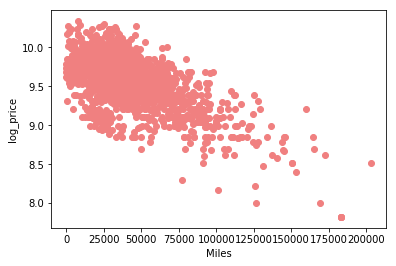

In [55]:
plt.scatter(X2['Miles'],Y2,c='lightcoral')
plt.xlabel('Miles')
plt.ylabel('log_price')

Text(0,0.5,'log_price')

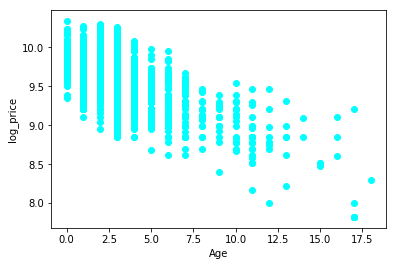

In [56]:
plt.scatter(X2['Age'],Y2,c='cyan')
plt.xlabel('Age')
plt.ylabel('log_price')